In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../csv/AAPL.csv", index_col = "Date")
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0


In [3]:
#결측치 조회(NaN, 음의 무한대, 양의 무한대)
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN
1981-08-21,0.363839,0.363839,0.359375,0.359375,0.287367,NaN


In [5]:
#결측치를 제외한 데이터를 출력
#df.dropna(axis =0)
df[~df.isin([np.nan, np.inf, -np.inf]).any(1)] # ~물결 표시는 반대.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0
...,...,...,...,...,...,...
2019-06-18,196.050003,200.289993,195.210007,198.449997,198.449997,26551000.0
2019-06-19,199.679993,199.880005,197.309998,197.869995,197.869995,21124200.0
2019-06-20,200.369995,200.610001,198.029999,199.460007,199.460007,21514000.0


In [6]:
#종가만 가지고 테스트
#시간과 종가만 있는 데이터 프레임
price_df = df.loc[:,["Adj Close"]]
price_df

,Adj Close
Date,
1980-12-12,0.410525
1980-12-15,0.389106
1980-12-16,0.360548
1980-12-17,0.369472
1980-12-18,0.380182
...,...
2019-06-18,198.449997
2019-06-19,197.869995
2019-06-20,199.460007


<AxesSubplot:xlabel='Date'>

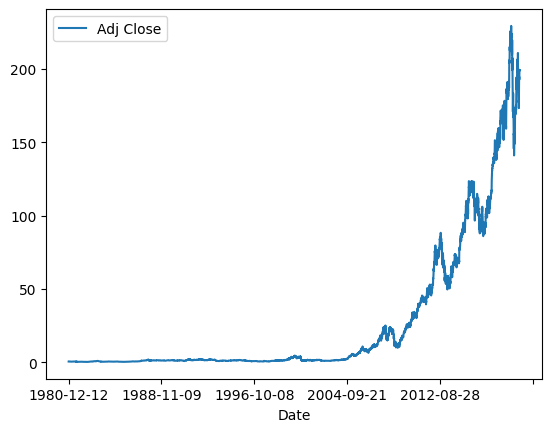

In [7]:
price_df.plot()

In [12]:
##일별 수익율, 파생변수 생성 = (오늘날짜의 종가 - 어제 날짜의 종가) / 어제 날짜의 종가
#price_df["daily_rtn"] = price_df["Adj Close"].diff()/price_df["Adj Close"].shift()

price_df["daily_rtn"] = price_df["Adj Close"].pct_change()
price_df.head()

,Adj Close,daily_rtn
Date,,
1980-12-12,0.410525,NaN
1980-12-15,0.389106,-0.052175
1980-12-16,0.360548,-0.073394
1980-12-17,0.369472,0.024751
1980-12-18,0.380182,0.028987


In [11]:
price_df["daily_rtn"] 

Date
1980-12-12         NaN
1980-12-15   -0.052175
1980-12-16   -0.073394
1980-12-17    0.024751
1980-12-18    0.028987
                ...   
2019-06-18    0.023518
2019-06-19   -0.002923
2019-06-20    0.008036
2019-06-21   -0.003409
2019-06-24    0.001962
Name: daily_rtn, Length: 9715, dtype: float64

In [15]:
##일별 수익율의 누적곱 확인
price_df['st_rtn'] = (1+ price_df["daily_rtn"]).cumprod()
price_df.head()
price_df.tail()

,Adj Close,daily_rtn,st_rtn
Date,,,
2019-06-18,198.449997,0.023518,483.405388
2019-06-19,197.869995,-0.002923,481.992558
2019-06-20,199.460007,0.008036,485.865677
2019-06-21,198.779999,-0.003409,484.209242
2019-06-24,199.169998,0.001962,485.159242


In [17]:
first_date = price_df.index[0]
last_date = price_df.index[-1]

In [18]:
print(first_date,last_date)

1980-12-12 2019-06-24


In [19]:
print(price_df.loc[last_date,'Adj Close']/price_df.loc[first_date,'Adj Close'])

485.15924243346933


In [20]:
print(price_df.loc[last_date,'st_rtn'])

485.1592424334637


<AxesSubplot:xlabel='Date'>

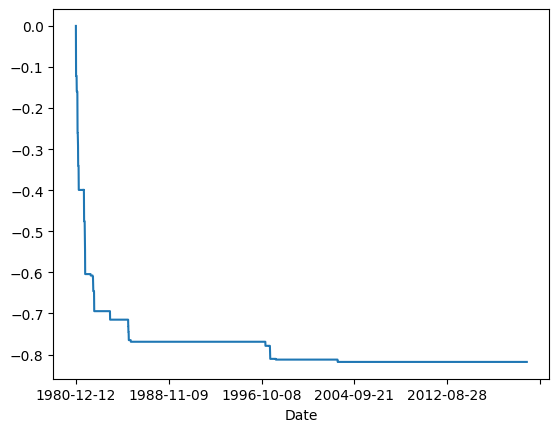

In [22]:
#backtesting
#cummax() - 종가에서 최고가 저장
#cummin() - 최대 하락
historical_max = price_df["Adj Close"].cummax()
daily_drawdown = price_df["Adj Close"]/historical_max - 1.0
historical_min = daily_drawdown.cummin()
historical_min.plot()

In [23]:
historical_max

Date
1980-12-12      0.410525
1980-12-15      0.410525
1980-12-16      0.410525
1980-12-17      0.410525
1980-12-18      0.410525
                 ...    
2019-06-18    229.392090
2019-06-19    229.392090
2019-06-20    229.392090
2019-06-21    229.392090
2019-06-24    229.392090
Name: Adj Close, Length: 9715, dtype: float64

In [24]:
historical_min

Date
1980-12-12    0.000000
1980-12-15   -0.052175
1980-12-16   -0.121739
1980-12-17   -0.121739
1980-12-18   -0.121739
                ...   
2019-06-18   -0.818015
2019-06-19   -0.818015
2019-06-20   -0.818015
2019-06-21   -0.818015
2019-06-24   -0.818015
Name: Adj Close, Length: 9715, dtype: float64

In [25]:
## CAGR : 일별 date 사용 -> 전체연도를 계산하는 경우 전체 데이터의 기간을 252영업일 기준으로 나눈 역수를 제곱한 후 -1 
        ## 예를 들어 2020년 154억원에서 2025년 254억으로 성장 할 것이다.   = (254/154) ^ (1.5) -1 = 10.5%   즉 2021년에는 154 * 1+(10.5%) = 170억 예상
## MDD : 최대 낙폭
## VOL : 연 주가 수익률 표준 편차 = 일별 주가 수익률 * 252일 제곱근
## sharpe : 총 위험 1단위 당 초과 수익률

CAGR = price_df.loc[last_date, 'st_rtn'] ** (252/len(price_df))-1
sharpe = np.mean(price_df["daily_rtn"])/np.std(price_df["daily_rtn"])*np.sqrt(252)
VOL = np.std(price_df["daily_rtn"]) * np.sqrt(252)
MDD = historical_min.min()

In [31]:
print(VOL)
print('CAGR: ', round(CAGR*100,2), '%')
print('Sharpe: ', round(sharpe,2))
print('VOL: ', round(VOL*100,2), '%')
print('MDD: ', round(-1*MDD*100,2), '%')


0.45678860242516073
CAGR:  17.4 %
Sharpe:  0.58
VOL:  45.68 %
MDD:  81.8 %


In [45]:
import buy_and_hold as b_h
import imp
imp.reload(b_h)

<module 'buy_and_hold' from '/Users/chulwonchae/UBION/220913/buy_and_hold/__init__.py'>

In [46]:
df = pd.read_csv("../csv/AMZN.csv", index_col = "Date")

In [47]:
#클래스 생성
bh_df = b_h.buyandhold(df, 'Adj Close')

In [48]:
bh_df.drop_na()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2019-06-18,1901.369995
2019-06-19,1908.790039
2019-06-20,1918.189941


In [49]:
# 파생변수 생성 함수 add_column
bh_df.add_column()

,Adj Close,daily_rtn,st_rtn
Date,,,
1997-05-15,1.958333,NaN,NaN
1997-05-16,1.729167,-0.117021,0.882979
1997-05-19,1.708333,-0.012049,0.872340
1997-05-20,1.635417,-0.042683,0.835107
1997-05-21,1.427083,-0.127389,0.728723
...,...,...,...
2019-06-18,1901.369995,0.008133,970.912503
2019-06-19,1908.790039,0.003902,974.701462
2019-06-20,1918.189941,0.004925,979.501413


In [50]:
bh_df.testing()

[0.365793900198663, 0.8136327617304074, 0.6008984712355606, -0.944042179261863]

In [51]:
result = bh_df.testing()

In [53]:
CAGR = result[0]
sharpe = result[1]
VOL = result[2]
MDD = result[3]


print('CAGR: ', round(CAGR*100,2), '%')
print('Sharpe: ', round(sharpe,2))
print('VOL: ', round(VOL*100,2), '%')
print('MDD: ', round(-1*MDD*100,2), '%')

CAGR:  36.58 %
Sharpe:  0.81
VOL:  60.09 %
MDD:  94.4 %


In [55]:
pip install finance-datareader

     |████████████████████████████████| 78 kB 10.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install bs4

Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4 ... done
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [57]:
import FinanceDataReader as fdr

In [58]:
ko_df = fdr.DataReader('KS11','2020-01-01','2022-09-10') # 종목코드, 시작시간, 종료시간
ko_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102
2020-01-03,2176.46,2192.58,2203.38,2165.39,631560000.0,0.0006
2020-01-06,2155.07,2154.97,2164.42,2149.95,592670000.0,-0.0098
2020-01-07,2175.54,2166.60,2181.62,2164.27,568240000.0,0.0095
2020-01-08,2151.31,2156.27,2162.32,2137.72,913830000.0,-0.0111
...,...,...,...,...,...,...
2022-09-02,2409.41,2427.70,2432.37,2402.67,391600000.0,-0.0026
2022-09-05,2403.68,2410.07,2424.77,2392.63,354740000.0,-0.0024
2022-09-06,2410.02,2409.72,2422.53,2399.26,294220000.0,0.0026


In [59]:
bh_df_2 = b_h.buyandhold(ko_df, 'Close')

In [60]:
bh_df_2.drop_na()

,Close
Date,
2020-01-02,2175.17
2020-01-03,2176.46
2020-01-06,2155.07
2020-01-07,2175.54
2020-01-08,2151.31
...,...
2022-09-02,2409.41
2022-09-05,2403.68
2022-09-06,2410.02


In [61]:
bh_df_2.add_column()

,Close,daily_rtn,st_rtn
Date,,,
2020-01-02,2175.17,NaN,NaN
2020-01-03,2176.46,0.000593,1.000593
2020-01-06,2155.07,-0.009828,0.990759
2020-01-07,2175.54,0.009499,1.000170
2020-01-08,2151.31,-0.011137,0.989031
...,...,...,...
2022-09-02,2409.41,-0.002567,1.107688
2022-09-05,2403.68,-0.002378,1.105054
2022-09-06,2410.02,0.002638,1.107969


In [62]:
bh_df_2.testing()

[0.03534167310986103,
 0.2682887239170728,
 0.21954966989801789,
 -0.35708898445253057]

In [63]:
result = bh_df_2.testing()

In [64]:
CAGR = result[0]
sharpe = result[1]
VOL = result[2]
MDD = result[3]


print('CAGR: ', round(CAGR*100,2), '%')
print('Sharpe: ', round(sharpe,2))
print('VOL: ', round(VOL*100,2), '%')
print('MDD: ', round(-1*MDD*100,2), '%')

CAGR:  3.53 %
Sharpe:  0.27
VOL:  21.95 %
MDD:  35.71 %
